# Introduction to Convolutional Neural Networks

CSC/DSC 340 Week 10 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023

## Introduction and Termoinology

* This week we will cover convolutional neural networks (CNNs)
    * Image analysis, video analysis, object detection
* Note that we will not be going through any mathematics this week as the mathematics of CNNs is quite complicated but there are many good resources (including your textbook) if you are interested

* Convolution refers to the mathematical combination of two functions to produce a third function
    * It merges two sets of information
    * The convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

![CNNs](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

[Image Source](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

## Introduction to the MNIST Data Set
* Photos (28 pixels by 28 pixels) of handwritten numeric digits as the input
* Number shown in the photo as an output
* Challenges: 2D data structure (images), variations in handwriting, low quality images, size of data set (60,000 images in the training set, 10,000 in the test set)

### Import With Tensorflow
* Also avaliable through Scikit-Learn, but does not come automatically split into a training and test set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


* Let's display some of the images

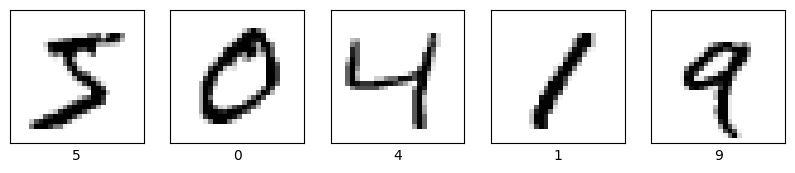

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* 60k is a lot of images to have in a training set (though may be needed for large neural networks)
* Let's randomly select 5k images to use for training instead of 60k so networks train faster
* Can use a smaller data set in the construction of your neural network (hyperparameter tuning process) but then use a larger sample to train the final network

In [3]:
import numpy as np
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

* Classification can suffer from class imbalances. Let's make sure our data is relatively evenly distributed.

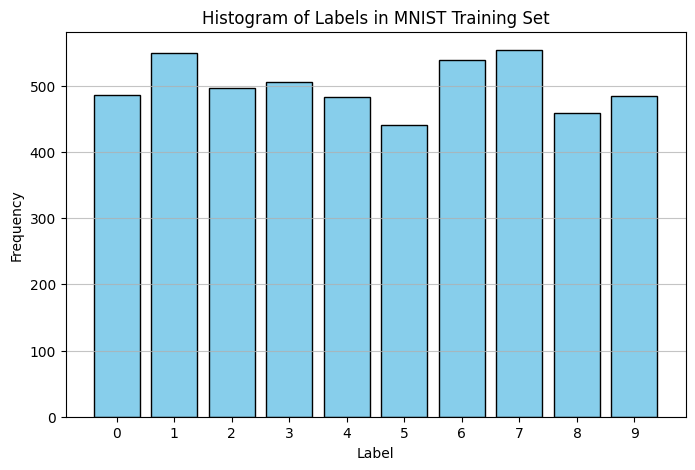

In [4]:
# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Classification with a Regular Neural Network
* We can clasify the MNIST data with a regular neural network, but due to its architecture we have to flatten the data before it can reach the dense layers
* Neural networks can be used to successfully classify images, but flattening the images can remove important patterns

* Create a model that flattens the data (28x28 pixel images). We then have one hidden layer with 128 neurons and a Relu activation function, and an output layer with 10 neurons (10 possible outputs) and a softmax activation function since this is a classification.

In [5]:
from tensorflow.keras import layers, models
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* For compiling the model we will use the Adam optimizer, our metric of success will be accuracy, and our loss function is sparse categorical cross-entropy
    * Sparse categorical cross-entropy is similiar to categorical cross-entropy but while categorical cross-entropy requires the data to be one-hot encoded prior to training the model, sparse categorical cross-entropy does not

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Train the model and the determine the accuracy

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


   1/1875 [..............................] - ETA: 10:30 - loss: 2.3843 - accuracy: 0.0312

  17/1875 [..............................] - ETA: 5s - loss: 1.8910 - accuracy: 0.3989   

  37/1875 [..............................] - ETA: 5s - loss: 1.4646 - accuracy: 0.5718

  54/1875 [..............................] - ETA: 5s - loss: 1.2223 - accuracy: 0.6499

  83/1875 [>.............................] - ETA: 4s - loss: 0.9770 - accuracy: 0.7236

 106/1875 [>.............................] - ETA: 4s - loss: 0.8724 - accuracy: 0.7559

 127/1875 [=>............................] - ETA: 4s - loss: 0.8021 - accuracy: 0.7746

 158/1875 [=>............................] - ETA: 3s - loss: 0.7188 - accuracy: 0.7989

 191/1875 [==>...........................] - ETA: 3s - loss: 0.6544 - accuracy: 0.8146

 229/1875 [==>...........................] - ETA: 3s - loss: 0.6009 - accuracy: 0.8297

 268/1875 [===>..........................] - ETA: 3s - loss: 0.5640 - accuracy: 0.8393

 307/1875 [===>..........................] - ETA: 2s - loss: 0.5392 - accuracy: 0.8462

 353/1875 [====>.........................] - ETA: 2s - loss: 0.5104 - accuracy: 0.8540

 402/1875 [=====>........................] - ETA: 2s - loss: 0.4840 - accuracy: 0.8626

 430/1875 [=====>........................] - ETA: 2s - loss: 0.4709 - accuracy: 0.8657

 461/1875 [======>.......................] - ETA: 2s - loss: 0.4601 - accuracy: 0.8693

 494/1875 [======>.......................] - ETA: 2s - loss: 0.4450 - accuracy: 0.8737

 531/1875 [=======>......................] - ETA: 2s - loss: 0.4310 - accuracy: 0.8774

 574/1875 [========>.....................] - ETA: 2s - loss: 0.4172 - accuracy: 0.8810

 617/1875 [========>.....................] - ETA: 1s - loss: 0.4061 - accuracy: 0.8834

 657/1875 [=========>....................] - ETA: 1s - loss: 0.3927 - accuracy: 0.8874

 684/1875 [=========>....................] - ETA: 1s - loss: 0.3863 - accuracy: 0.8890

 712/1875 [==========>...................] - ETA: 1s - loss: 0.3818 - accuracy: 0.8903

 752/1875 [===========>..................] - ETA: 1s - loss: 0.3738 - accuracy: 0.8923

 792/1875 [===========>..................] - ETA: 1s - loss: 0.3672 - accuracy: 0.8944

 827/1875 [============>.................] - ETA: 1s - loss: 0.3604 - accuracy: 0.8965

 851/1875 [============>.................] - ETA: 1s - loss: 0.3564 - accuracy: 0.8977

 878/1875 [=============>................] - ETA: 1s - loss: 0.3517 - accuracy: 0.8990

 920/1875 [=============>................] - ETA: 1s - loss: 0.3444 - accuracy: 0.9014

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3384 - accuracy: 0.9030

 991/1875 [==============>...............] - ETA: 1s - loss: 0.3344 - accuracy: 0.9039

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3306 - accuracy: 0.9048

1056/1875 [===============>..............] - ETA: 1s - loss: 0.3259 - accuracy: 0.9062

1101/1875 [================>.............] - ETA: 1s - loss: 0.3216 - accuracy: 0.9072

1146/1875 [=================>............] - ETA: 1s - loss: 0.3153 - accuracy: 0.9092

1193/1875 [==================>...........] - ETA: 1s - loss: 0.3099 - accuracy: 0.9105

1231/1875 [==================>...........] - ETA: 0s - loss: 0.3055 - accuracy: 0.9118

1270/1875 [===================>..........] - ETA: 0s - loss: 0.3014 - accuracy: 0.9130

1306/1875 [===================>..........] - ETA: 0s - loss: 0.2986 - accuracy: 0.9140

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2943 - accuracy: 0.9155

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2906 - accuracy: 0.9166

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2877 - accuracy: 0.9174

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2829 - accuracy: 0.9188

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2791 - accuracy: 0.9199

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2754 - accuracy: 0.9209

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2719 - accuracy: 0.9217

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2697 - accuracy: 0.9224

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2678 - accuracy: 0.9229

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2645 - accuracy: 0.9239

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2615 - accuracy: 0.9247

1856/1875 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9253

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9258 - val_loss: 0.1307 - val_accuracy: 0.9612


Epoch 2/5


   1/1875 [..............................] - ETA: 4s - loss: 0.0938 - accuracy: 1.0000

  34/1875 [..............................] - ETA: 2s - loss: 0.1155 - accuracy: 0.9660

  67/1875 [>.............................] - ETA: 2s - loss: 0.1156 - accuracy: 0.9669

 103/1875 [>.............................] - ETA: 2s - loss: 0.1130 - accuracy: 0.9669

 135/1875 [=>............................] - ETA: 2s - loss: 0.1159 - accuracy: 0.9657

 171/1875 [=>............................] - ETA: 2s - loss: 0.1178 - accuracy: 0.9660

 205/1875 [==>...........................] - ETA: 2s - loss: 0.1130 - accuracy: 0.9680

 242/1875 [==>...........................] - ETA: 2s - loss: 0.1133 - accuracy: 0.9676

 286/1875 [===>..........................] - ETA: 2s - loss: 0.1156 - accuracy: 0.9662

 326/1875 [====>.........................] - ETA: 2s - loss: 0.1172 - accuracy: 0.9656

 365/1875 [====>.........................] - ETA: 2s - loss: 0.1174 - accuracy: 0.9653

 399/1875 [=====>........................] - ETA: 2s - loss: 0.1181 - accuracy: 0.9653

 433/1875 [=====>........................] - ETA: 2s - loss: 0.1185 - accuracy: 0.9651

 465/1875 [======>.......................] - ETA: 2s - loss: 0.1172 - accuracy: 0.9655

 501/1875 [=======>......................] - ETA: 1s - loss: 0.1178 - accuracy: 0.9657

 536/1875 [=======>......................] - ETA: 1s - loss: 0.1180 - accuracy: 0.9656

 574/1875 [========>.....................] - ETA: 1s - loss: 0.1178 - accuracy: 0.9654

 615/1875 [========>.....................] - ETA: 1s - loss: 0.1187 - accuracy: 0.9653

 652/1875 [=========>....................] - ETA: 1s - loss: 0.1186 - accuracy: 0.9652

 700/1875 [==========>...................] - ETA: 1s - loss: 0.1188 - accuracy: 0.9650

 745/1875 [==========>...................] - ETA: 1s - loss: 0.1178 - accuracy: 0.9650

 788/1875 [===========>..................] - ETA: 1s - loss: 0.1185 - accuracy: 0.9647

 834/1875 [============>.................] - ETA: 1s - loss: 0.1182 - accuracy: 0.9649

 882/1875 [=============>................] - ETA: 1s - loss: 0.1183 - accuracy: 0.9646

 930/1875 [=============>................] - ETA: 1s - loss: 0.1187 - accuracy: 0.9643

 975/1875 [==============>...............] - ETA: 1s - loss: 0.1186 - accuracy: 0.9643

1023/1875 [===============>..............] - ETA: 1s - loss: 0.1180 - accuracy: 0.9647

1071/1875 [================>.............] - ETA: 1s - loss: 0.1180 - accuracy: 0.9648

1119/1875 [================>.............] - ETA: 0s - loss: 0.1173 - accuracy: 0.9649

1167/1875 [=================>............] - ETA: 0s - loss: 0.1174 - accuracy: 0.9649

1214/1875 [==================>...........] - ETA: 0s - loss: 0.1175 - accuracy: 0.9649

1260/1875 [===================>..........] - ETA: 0s - loss: 0.1168 - accuracy: 0.9649

1308/1875 [===================>..........] - ETA: 0s - loss: 0.1165 - accuracy: 0.9651

1361/1875 [====================>.........] - ETA: 0s - loss: 0.1161 - accuracy: 0.9653

1409/1875 [=====================>........] - ETA: 0s - loss: 0.1157 - accuracy: 0.9656

1456/1875 [======================>.......] - ETA: 0s - loss: 0.1156 - accuracy: 0.9657

1505/1875 [=======================>......] - ETA: 0s - loss: 0.1154 - accuracy: 0.9658

1555/1875 [=======================>......] - ETA: 0s - loss: 0.1151 - accuracy: 0.9660

1604/1875 [========================>.....] - ETA: 0s - loss: 0.1140 - accuracy: 0.9663

1655/1875 [=========================>....] - ETA: 0s - loss: 0.1132 - accuracy: 0.9666

1704/1875 [==========================>...] - ETA: 0s - loss: 0.1125 - accuracy: 0.9667

1742/1875 [==========================>...] - ETA: 0s - loss: 0.1122 - accuracy: 0.9667

1776/1875 [===========================>..] - ETA: 0s - loss: 0.1120 - accuracy: 0.9667

1812/1875 [===========================>..] - ETA: 0s - loss: 0.1123 - accuracy: 0.9668

1845/1875 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9668

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1118 - accuracy: 0.9668 - val_loss: 0.0968 - val_accuracy: 0.9707


Epoch 3/5


   1/1875 [..............................] - ETA: 4s - loss: 0.0189 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0767 - accuracy: 0.9778

  63/1875 [>.............................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9772

  95/1875 [>.............................] - ETA: 2s - loss: 0.0705 - accuracy: 0.9783

 133/1875 [=>............................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9784

 170/1875 [=>............................] - ETA: 2s - loss: 0.0730 - accuracy: 0.9789

 210/1875 [==>...........................] - ETA: 2s - loss: 0.0755 - accuracy: 0.9780

 254/1875 [===>..........................] - ETA: 2s - loss: 0.0729 - accuracy: 0.9791

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9791

 346/1875 [====>.........................] - ETA: 2s - loss: 0.0711 - accuracy: 0.9799

 384/1875 [=====>........................] - ETA: 1s - loss: 0.0718 - accuracy: 0.9796

 432/1875 [=====>........................] - ETA: 1s - loss: 0.0710 - accuracy: 0.9796

 479/1875 [======>.......................] - ETA: 1s - loss: 0.0715 - accuracy: 0.9796

 525/1875 [=======>......................] - ETA: 1s - loss: 0.0743 - accuracy: 0.9787

 567/1875 [========>.....................] - ETA: 1s - loss: 0.0745 - accuracy: 0.9785

 607/1875 [========>.....................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9785

 646/1875 [=========>....................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9787

 690/1875 [==========>...................] - ETA: 1s - loss: 0.0736 - accuracy: 0.9788

 714/1875 [==========>...................] - ETA: 1s - loss: 0.0741 - accuracy: 0.9788

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9789

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0745 - accuracy: 0.9787

 821/1875 [============>.................] - ETA: 1s - loss: 0.0751 - accuracy: 0.9783

 854/1875 [============>.................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9784

 891/1875 [=============>................] - ETA: 1s - loss: 0.0763 - accuracy: 0.9781

 916/1875 [=============>................] - ETA: 1s - loss: 0.0767 - accuracy: 0.9781

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0775 - accuracy: 0.9780

 979/1875 [==============>...............] - ETA: 1s - loss: 0.0777 - accuracy: 0.9778

1026/1875 [===============>..............] - ETA: 1s - loss: 0.0772 - accuracy: 0.9779

1074/1875 [================>.............] - ETA: 1s - loss: 0.0769 - accuracy: 0.9779

1127/1875 [=================>............] - ETA: 0s - loss: 0.0771 - accuracy: 0.9778

1176/1875 [=================>............] - ETA: 0s - loss: 0.0783 - accuracy: 0.9773

1228/1875 [==================>...........] - ETA: 0s - loss: 0.0776 - accuracy: 0.9773

1279/1875 [===================>..........] - ETA: 0s - loss: 0.0777 - accuracy: 0.9771

1336/1875 [====================>.........] - ETA: 0s - loss: 0.0772 - accuracy: 0.9771

1396/1875 [=====================>........] - ETA: 0s - loss: 0.0777 - accuracy: 0.9770

1452/1875 [======================>.......] - ETA: 0s - loss: 0.0775 - accuracy: 0.9772

1510/1875 [=======================>......] - ETA: 0s - loss: 0.0775 - accuracy: 0.9772

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0775 - accuracy: 0.9771

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0782 - accuracy: 0.9770

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9771

1715/1875 [==========================>...] - ETA: 0s - loss: 0.0776 - accuracy: 0.9772

1765/1875 [===========================>..] - ETA: 0s - loss: 0.0772 - accuracy: 0.9774

1814/1875 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9772

1865/1875 [============================>.] - ETA: 0s - loss: 0.0773 - accuracy: 0.9773

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0772 - accuracy: 0.9773 - val_loss: 0.0842 - val_accuracy: 0.9756


Epoch 4/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0071 - accuracy: 1.0000

  55/1875 [..............................] - ETA: 1s - loss: 0.0490 - accuracy: 0.9909

 111/1875 [>.............................] - ETA: 1s - loss: 0.0507 - accuracy: 0.9882

 167/1875 [=>............................] - ETA: 1s - loss: 0.0530 - accuracy: 0.9856

 224/1875 [==>...........................] - ETA: 1s - loss: 0.0540 - accuracy: 0.9845

 274/1875 [===>..........................] - ETA: 1s - loss: 0.0541 - accuracy: 0.9847

 315/1875 [====>.........................] - ETA: 1s - loss: 0.0521 - accuracy: 0.9855

 363/1875 [====>.........................] - ETA: 1s - loss: 0.0510 - accuracy: 0.9855

 408/1875 [=====>........................] - ETA: 1s - loss: 0.0521 - accuracy: 0.9847

 455/1875 [======>.......................] - ETA: 1s - loss: 0.0540 - accuracy: 0.9839

 504/1875 [=======>......................] - ETA: 1s - loss: 0.0554 - accuracy: 0.9836

 556/1875 [=======>......................] - ETA: 1s - loss: 0.0552 - accuracy: 0.9834

 600/1875 [========>.....................] - ETA: 1s - loss: 0.0554 - accuracy: 0.9832

 639/1875 [=========>....................] - ETA: 1s - loss: 0.0547 - accuracy: 0.9834

 658/1875 [=========>....................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9832

 666/1875 [=========>....................] - ETA: 1s - loss: 0.0547 - accuracy: 0.9834

 679/1875 [=========>....................] - ETA: 1s - loss: 0.0551 - accuracy: 0.9832

 710/1875 [==========>...................] - ETA: 1s - loss: 0.0557 - accuracy: 0.9832

 743/1875 [==========>...................] - ETA: 1s - loss: 0.0553 - accuracy: 0.9833

 775/1875 [===========>..................] - ETA: 1s - loss: 0.0561 - accuracy: 0.9828

 802/1875 [===========>..................] - ETA: 1s - loss: 0.0562 - accuracy: 0.9827

 821/1875 [============>.................] - ETA: 1s - loss: 0.0560 - accuracy: 0.9828

 841/1875 [============>.................] - ETA: 1s - loss: 0.0569 - accuracy: 0.9824

 869/1875 [============>.................] - ETA: 1s - loss: 0.0567 - accuracy: 0.9826

 890/1875 [=============>................] - ETA: 1s - loss: 0.0568 - accuracy: 0.9826

 914/1875 [=============>................] - ETA: 1s - loss: 0.0569 - accuracy: 0.9825

 948/1875 [==============>...............] - ETA: 1s - loss: 0.0567 - accuracy: 0.9827

 979/1875 [==============>...............] - ETA: 1s - loss: 0.0579 - accuracy: 0.9824

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0580 - accuracy: 0.9823

1046/1875 [===============>..............] - ETA: 1s - loss: 0.0580 - accuracy: 0.9823

1086/1875 [================>.............] - ETA: 1s - loss: 0.0579 - accuracy: 0.9822

1132/1875 [=================>............] - ETA: 1s - loss: 0.0578 - accuracy: 0.9822

1176/1875 [=================>............] - ETA: 0s - loss: 0.0576 - accuracy: 0.9823

1200/1875 [==================>...........] - ETA: 0s - loss: 0.0581 - accuracy: 0.9822

1221/1875 [==================>...........] - ETA: 0s - loss: 0.0580 - accuracy: 0.9822

1245/1875 [==================>...........] - ETA: 0s - loss: 0.0579 - accuracy: 0.9822

1261/1875 [===================>..........] - ETA: 0s - loss: 0.0579 - accuracy: 0.9822

1284/1875 [===================>..........] - ETA: 0s - loss: 0.0578 - accuracy: 0.9822

1313/1875 [====================>.........] - ETA: 0s - loss: 0.0584 - accuracy: 0.9821

1345/1875 [====================>.........] - ETA: 0s - loss: 0.0586 - accuracy: 0.9820

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0582 - accuracy: 0.9822

1425/1875 [=====================>........] - ETA: 0s - loss: 0.0585 - accuracy: 0.9822

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0583 - accuracy: 0.9822

1516/1875 [=======================>......] - ETA: 0s - loss: 0.0579 - accuracy: 0.9823

1562/1875 [=======================>......] - ETA: 0s - loss: 0.0578 - accuracy: 0.9825

1601/1875 [========================>.....] - ETA: 0s - loss: 0.0580 - accuracy: 0.9824

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0581 - accuracy: 0.9823

1692/1875 [==========================>...] - ETA: 0s - loss: 0.0584 - accuracy: 0.9822

1739/1875 [==========================>...] - ETA: 0s - loss: 0.0584 - accuracy: 0.9822

1786/1875 [===========================>..] - ETA: 0s - loss: 0.0583 - accuracy: 0.9823

1836/1875 [============================>.] - ETA: 0s - loss: 0.0584 - accuracy: 0.9823

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0724 - val_accuracy: 0.9785


Epoch 5/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0322 - accuracy: 1.0000

  57/1875 [..............................] - ETA: 1s - loss: 0.0451 - accuracy: 0.9879

 111/1875 [>.............................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9890

 167/1875 [=>............................] - ETA: 1s - loss: 0.0369 - accuracy: 0.9895

 223/1875 [==>...........................] - ETA: 1s - loss: 0.0362 - accuracy: 0.9898

 281/1875 [===>..........................] - ETA: 1s - loss: 0.0364 - accuracy: 0.9892

 349/1875 [====>.........................] - ETA: 1s - loss: 0.0387 - accuracy: 0.9883

 413/1875 [=====>........................] - ETA: 1s - loss: 0.0399 - accuracy: 0.9876

 473/1875 [======>.......................] - ETA: 1s - loss: 0.0407 - accuracy: 0.9874

 536/1875 [=======>......................] - ETA: 1s - loss: 0.0408 - accuracy: 0.9874

 597/1875 [========>.....................] - ETA: 1s - loss: 0.0415 - accuracy: 0.9870

 664/1875 [=========>....................] - ETA: 1s - loss: 0.0413 - accuracy: 0.9873

 728/1875 [==========>...................] - ETA: 0s - loss: 0.0414 - accuracy: 0.9875

 788/1875 [===========>..................] - ETA: 0s - loss: 0.0421 - accuracy: 0.9873

 853/1875 [============>.................] - ETA: 0s - loss: 0.0433 - accuracy: 0.9868

 907/1875 [=============>................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9868

 961/1875 [==============>...............] - ETA: 0s - loss: 0.0435 - accuracy: 0.9870

 998/1875 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 0.9871

1034/1875 [===============>..............] - ETA: 0s - loss: 0.0424 - accuracy: 0.9872

1083/1875 [================>.............] - ETA: 0s - loss: 0.0426 - accuracy: 0.9872

1127/1875 [=================>............] - ETA: 0s - loss: 0.0428 - accuracy: 0.9871

1178/1875 [=================>............] - ETA: 0s - loss: 0.0424 - accuracy: 0.9872

1236/1875 [==================>...........] - ETA: 0s - loss: 0.0424 - accuracy: 0.9872

1296/1875 [===================>..........] - ETA: 0s - loss: 0.0424 - accuracy: 0.9871

1349/1875 [====================>.........] - ETA: 0s - loss: 0.0435 - accuracy: 0.9868

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0437 - accuracy: 0.9867

1458/1875 [======================>.......] - ETA: 0s - loss: 0.0438 - accuracy: 0.9867

1514/1875 [=======================>......] - ETA: 0s - loss: 0.0438 - accuracy: 0.9866

1561/1875 [=======================>......] - ETA: 0s - loss: 0.0438 - accuracy: 0.9866

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0439 - accuracy: 0.9865

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0440 - accuracy: 0.9864

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0440 - accuracy: 0.9864

1770/1875 [===========================>..] - ETA: 0s - loss: 0.0438 - accuracy: 0.9865

1820/1875 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9866

1872/1875 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9866

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0793 - val_accuracy: 0.9766


313/313 - 0s - loss: 0.0793 - accuracy: 0.9766 - 165ms/epoch - 526us/step



Test accuracy: 0.9765999913215637


* When we perform classification without one-hot encoding, the outputs of the model are not the class labels, but rather the probability that the input belongs to each class

In [8]:
# Predict the test set
y_pred = model.predict(test_images)
print(y_pred[0])

  1/313 [..............................] - ETA: 23s

103/313 [========>.....................] - ETA: 0s 

212/313 [===================>..........] - ETA: 0s

313/313 [==============================] - 0s 472us/step


[4.5498120e-07 2.2232042e-08 3.9091155e-06 1.5409208e-04 7.1686757e-10
 2.7545653e-07 1.2268902e-11 9.9983549e-01 4.4239173e-06 1.2805724e-06]


* Before performing further anaysis on our neural network outputs, we need to convert the data from probabilities to the actual class label

In [9]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(y_pred[0])

  1/313 [..............................] - ETA: 2s

105/313 [=========>....................] - ETA: 0s

213/313 [===================>..........] - ETA: 0s

313/313 [==============================] - 0s 471us/step


7


* Now let's create a confusion matrix to see which points are being misclassified

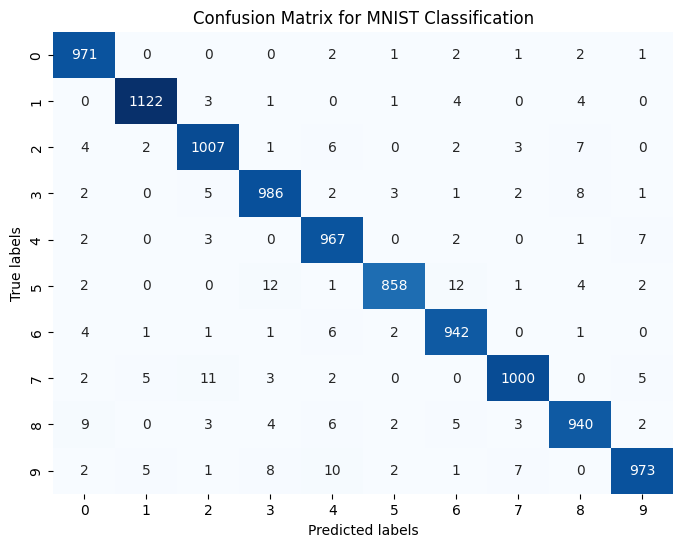

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Classification with a Convolutional Neural Network



### Types of Layers and Keras Syntax

* Conv2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    * The first number is the number of filters (dimensionality of the output)
    * The tuple is the stride (the width and height of the section of pixels to be reduced down)
    * Activation has the same function here as in regular neural networks
    * Convolutional layers apply learnable filters to the data that creates a feature map to a higher or lower dimensional space
    * Used to detect important features and patterns in the data
* MaxPooling2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
    * Tuple is the pool size (the size block over which to find the maximum)
    * Pooling layers reduce the dimensionality of the data while keeping the most important features
    * Two types of pooling layers: max pooling and average pooling
* Stacking convolutional and pooling layers allows CNNS to learn in a heirarchical manner
    * First the networks learns basic featutes of the data (like edges and textures) and then more complicated features
    * This heirarchical learning is what makes CNNS so effective at image analysis
* Note that not every convolutional layer has to be followed by a pooling layer, too many pooling layers can be bad

### Full Neural Network for Classification
* Have two pairs of convolutional layers/pooling layers of different sizes followed by a lone convolutional layer
* The `Flatten()` layer is needed to take the 2D data down to one dimension for the dense layers
* The first dense layer (a hidden layer) does some post-processing on the data that comes from the CNN layers, the second dense layer is the output layer

In [11]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* Model is compiled, trained, and tested in the same way as the regular neural network

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


  1/844 [..............................] - ETA: 3:19 - loss: 2.3054 - accuracy: 0.1250

  6/844 [..............................] - ETA: 9s - loss: 2.2196 - accuracy: 0.1875  

 11/844 [..............................] - ETA: 9s - loss: 2.1082 - accuracy: 0.2443

 16/844 [..............................] - ETA: 9s - loss: 1.9489 - accuracy: 0.3574

 20/844 [..............................] - ETA: 9s - loss: 1.8036 - accuracy: 0.4141

 25/844 [..............................] - ETA: 9s - loss: 1.6225 - accuracy: 0.4806

 27/844 [..............................] - ETA: 10s - loss: 1.5634 - accuracy: 0.4994

 31/844 [>.............................] - ETA: 11s - loss: 1.4653 - accuracy: 0.5302

 34/844 [>.............................] - ETA: 11s - loss: 1.3998 - accuracy: 0.5496

 38/844 [>.............................] - ETA: 11s - loss: 1.3234 - accuracy: 0.5711

 43/844 [>.............................] - ETA: 11s - loss: 1.2374 - accuracy: 0.5977

 47/844 [>.............................] - ETA: 11s - loss: 1.1784 - accuracy: 0.6164

 49/844 [>.............................] - ETA: 13s - loss: 1.1486 - accuracy: 0.6263

 51/844 [>.............................] - ETA: 14s - loss: 1.1233 - accuracy: 0.6345

 53/844 [>.............................] - ETA: 14s - loss: 1.0988 - accuracy: 0.6424

 56/844 [>.............................] - ETA: 14s - loss: 1.0640 - accuracy: 0.6540

 58/844 [=>............................] - ETA: 14s - loss: 1.0433 - accuracy: 0.6614

 60/844 [=>............................] - ETA: 14s - loss: 1.0195 - accuracy: 0.6695

 62/844 [=>............................] - ETA: 15s - loss: 0.9969 - accuracy: 0.6772

 64/844 [=>............................] - ETA: 15s - loss: 0.9851 - accuracy: 0.6821

 66/844 [=>............................] - ETA: 15s - loss: 0.9660 - accuracy: 0.6884

 69/844 [=>............................] - ETA: 15s - loss: 0.9421 - accuracy: 0.6966

 72/844 [=>............................] - ETA: 15s - loss: 0.9200 - accuracy: 0.7046

 74/844 [=>............................] - ETA: 16s - loss: 0.9037 - accuracy: 0.7099

 76/844 [=>............................] - ETA: 16s - loss: 0.8858 - accuracy: 0.7161

 78/844 [=>............................] - ETA: 16s - loss: 0.8722 - accuracy: 0.7212

 80/844 [=>............................] - ETA: 16s - loss: 0.8586 - accuracy: 0.7256

 82/844 [=>............................] - ETA: 17s - loss: 0.8482 - accuracy: 0.7288

 85/844 [==>...........................] - ETA: 17s - loss: 0.8334 - accuracy: 0.7335

 87/844 [==>...........................] - ETA: 17s - loss: 0.8240 - accuracy: 0.7364

 89/844 [==>...........................] - ETA: 17s - loss: 0.8140 - accuracy: 0.7396

 91/844 [==>...........................] - ETA: 17s - loss: 0.8070 - accuracy: 0.7423

 93/844 [==>...........................] - ETA: 17s - loss: 0.7988 - accuracy: 0.7458

 95/844 [==>...........................] - ETA: 17s - loss: 0.7881 - accuracy: 0.7492

 97/844 [==>...........................] - ETA: 17s - loss: 0.7769 - accuracy: 0.7527

 99/844 [==>...........................] - ETA: 18s - loss: 0.7676 - accuracy: 0.7555

101/844 [==>...........................] - ETA: 18s - loss: 0.7580 - accuracy: 0.7590

103/844 [==>...........................] - ETA: 18s - loss: 0.7485 - accuracy: 0.7620

105/844 [==>...........................] - ETA: 18s - loss: 0.7405 - accuracy: 0.7647

107/844 [==>...........................] - ETA: 18s - loss: 0.7334 - accuracy: 0.7669

110/844 [==>...........................] - ETA: 18s - loss: 0.7214 - accuracy: 0.7714

112/844 [==>...........................] - ETA: 18s - loss: 0.7138 - accuracy: 0.7744

114/844 [===>..........................] - ETA: 18s - loss: 0.7049 - accuracy: 0.7771

116/844 [===>..........................] - ETA: 18s - loss: 0.6982 - accuracy: 0.7795

118/844 [===>..........................] - ETA: 18s - loss: 0.6915 - accuracy: 0.7812

120/844 [===>..........................] - ETA: 18s - loss: 0.6847 - accuracy: 0.7837

122/844 [===>..........................] - ETA: 18s - loss: 0.6796 - accuracy: 0.7852

124/844 [===>..........................] - ETA: 19s - loss: 0.6737 - accuracy: 0.7876

126/844 [===>..........................] - ETA: 19s - loss: 0.6677 - accuracy: 0.7892

128/844 [===>..........................] - ETA: 19s - loss: 0.6625 - accuracy: 0.7909

129/844 [===>..........................] - ETA: 19s - loss: 0.6588 - accuracy: 0.7920

130/844 [===>..........................] - ETA: 19s - loss: 0.6551 - accuracy: 0.7933

132/844 [===>..........................] - ETA: 19s - loss: 0.6486 - accuracy: 0.7955

133/844 [===>..........................] - ETA: 19s - loss: 0.6456 - accuracy: 0.7964

134/844 [===>..........................] - ETA: 20s - loss: 0.6427 - accuracy: 0.7972

136/844 [===>..........................] - ETA: 20s - loss: 0.6361 - accuracy: 0.7994

137/844 [===>..........................] - ETA: 20s - loss: 0.6330 - accuracy: 0.8004

138/844 [===>..........................] - ETA: 20s - loss: 0.6295 - accuracy: 0.8013

140/844 [===>..........................] - ETA: 20s - loss: 0.6244 - accuracy: 0.8028

141/844 [====>.........................] - ETA: 20s - loss: 0.6224 - accuracy: 0.8033

142/844 [====>.........................] - ETA: 21s - loss: 0.6187 - accuracy: 0.8047

143/844 [====>.........................] - ETA: 21s - loss: 0.6166 - accuracy: 0.8054

144/844 [====>.........................] - ETA: 21s - loss: 0.6139 - accuracy: 0.8063

146/844 [====>.........................] - ETA: 21s - loss: 0.6100 - accuracy: 0.8076

147/844 [====>.........................] - ETA: 21s - loss: 0.6067 - accuracy: 0.8088

149/844 [====>.........................] - ETA: 21s - loss: 0.6007 - accuracy: 0.8107

151/844 [====>.........................] - ETA: 21s - loss: 0.5948 - accuracy: 0.8126

153/844 [====>.........................] - ETA: 21s - loss: 0.5884 - accuracy: 0.8147

155/844 [====>.........................] - ETA: 21s - loss: 0.5847 - accuracy: 0.8160

157/844 [====>.........................] - ETA: 21s - loss: 0.5812 - accuracy: 0.8171

159/844 [====>.........................] - ETA: 21s - loss: 0.5767 - accuracy: 0.8185

161/844 [====>.........................] - ETA: 21s - loss: 0.5725 - accuracy: 0.8200

163/844 [====>.........................] - ETA: 21s - loss: 0.5683 - accuracy: 0.8215

166/844 [====>.........................] - ETA: 21s - loss: 0.5611 - accuracy: 0.8241

168/844 [====>.........................] - ETA: 21s - loss: 0.5566 - accuracy: 0.8254

171/844 [=====>........................] - ETA: 20s - loss: 0.5505 - accuracy: 0.8272

174/844 [=====>........................] - ETA: 20s - loss: 0.5438 - accuracy: 0.8292

176/844 [=====>........................] - ETA: 20s - loss: 0.5392 - accuracy: 0.8306

179/844 [=====>........................] - ETA: 20s - loss: 0.5346 - accuracy: 0.8319

182/844 [=====>........................] - ETA: 20s - loss: 0.5301 - accuracy: 0.8335

185/844 [=====>........................] - ETA: 20s - loss: 0.5249 - accuracy: 0.8355

188/844 [=====>........................] - ETA: 20s - loss: 0.5194 - accuracy: 0.8371

191/844 [=====>........................] - ETA: 19s - loss: 0.5136 - accuracy: 0.8392

194/844 [=====>........................] - ETA: 19s - loss: 0.5090 - accuracy: 0.8406

197/844 [======>.......................] - ETA: 19s - loss: 0.5038 - accuracy: 0.8423

200/844 [======>.......................] - ETA: 19s - loss: 0.4983 - accuracy: 0.8440

203/844 [======>.......................] - ETA: 19s - loss: 0.4933 - accuracy: 0.8458

206/844 [======>.......................] - ETA: 18s - loss: 0.4881 - accuracy: 0.8475

209/844 [======>.......................] - ETA: 18s - loss: 0.4844 - accuracy: 0.8488

212/844 [======>.......................] - ETA: 18s - loss: 0.4794 - accuracy: 0.8503

215/844 [======>.......................] - ETA: 18s - loss: 0.4744 - accuracy: 0.8520

218/844 [======>.......................] - ETA: 18s - loss: 0.4700 - accuracy: 0.8536

221/844 [======>.......................] - ETA: 18s - loss: 0.4660 - accuracy: 0.8547

224/844 [======>.......................] - ETA: 17s - loss: 0.4625 - accuracy: 0.8557

227/844 [=======>......................] - ETA: 17s - loss: 0.4602 - accuracy: 0.8565

230/844 [=======>......................] - ETA: 17s - loss: 0.4556 - accuracy: 0.8577

233/844 [=======>......................] - ETA: 17s - loss: 0.4522 - accuracy: 0.8588

236/844 [=======>......................] - ETA: 17s - loss: 0.4487 - accuracy: 0.8600

239/844 [=======>......................] - ETA: 17s - loss: 0.4449 - accuracy: 0.8611

242/844 [=======>......................] - ETA: 17s - loss: 0.4416 - accuracy: 0.8621

245/844 [=======>......................] - ETA: 16s - loss: 0.4380 - accuracy: 0.8633

248/844 [=======>......................] - ETA: 16s - loss: 0.4348 - accuracy: 0.8643

251/844 [=======>......................] - ETA: 16s - loss: 0.4313 - accuracy: 0.8654

254/844 [========>.....................] - ETA: 16s - loss: 0.4272 - accuracy: 0.8668

255/844 [========>.....................] - ETA: 16s - loss: 0.4261 - accuracy: 0.8671

256/844 [========>.....................] - ETA: 16s - loss: 0.4260 - accuracy: 0.8672

259/844 [========>.....................] - ETA: 16s - loss: 0.4231 - accuracy: 0.8679

262/844 [========>.....................] - ETA: 16s - loss: 0.4196 - accuracy: 0.8692

264/844 [========>.....................] - ETA: 16s - loss: 0.4176 - accuracy: 0.8699

266/844 [========>.....................] - ETA: 16s - loss: 0.4152 - accuracy: 0.8706

269/844 [========>.....................] - ETA: 16s - loss: 0.4116 - accuracy: 0.8717

271/844 [========>.....................] - ETA: 16s - loss: 0.4103 - accuracy: 0.8721

274/844 [========>.....................] - ETA: 16s - loss: 0.4068 - accuracy: 0.8732

277/844 [========>.....................] - ETA: 15s - loss: 0.4046 - accuracy: 0.8738

280/844 [========>.....................] - ETA: 15s - loss: 0.4013 - accuracy: 0.8747

283/844 [=========>....................] - ETA: 15s - loss: 0.3980 - accuracy: 0.8757

286/844 [=========>....................] - ETA: 15s - loss: 0.3950 - accuracy: 0.8765

289/844 [=========>....................] - ETA: 15s - loss: 0.3919 - accuracy: 0.8775

292/844 [=========>....................] - ETA: 15s - loss: 0.3884 - accuracy: 0.8786

295/844 [=========>....................] - ETA: 15s - loss: 0.3859 - accuracy: 0.8796

298/844 [=========>....................] - ETA: 15s - loss: 0.3829 - accuracy: 0.8805

300/844 [=========>....................] - ETA: 15s - loss: 0.3819 - accuracy: 0.8809

303/844 [=========>....................] - ETA: 14s - loss: 0.3802 - accuracy: 0.8814

305/844 [=========>....................] - ETA: 14s - loss: 0.3786 - accuracy: 0.8819

308/844 [=========>....................] - ETA: 14s - loss: 0.3766 - accuracy: 0.8825

311/844 [==========>...................] - ETA: 14s - loss: 0.3735 - accuracy: 0.8835

313/844 [==========>...................] - ETA: 14s - loss: 0.3718 - accuracy: 0.8840

316/844 [==========>...................] - ETA: 14s - loss: 0.3697 - accuracy: 0.8846

319/844 [==========>...................] - ETA: 14s - loss: 0.3677 - accuracy: 0.8853

321/844 [==========>...................] - ETA: 14s - loss: 0.3659 - accuracy: 0.8859

324/844 [==========>...................] - ETA: 14s - loss: 0.3636 - accuracy: 0.8867

327/844 [==========>...................] - ETA: 14s - loss: 0.3610 - accuracy: 0.8875

330/844 [==========>...................] - ETA: 13s - loss: 0.3589 - accuracy: 0.8881

333/844 [==========>...................] - ETA: 13s - loss: 0.3569 - accuracy: 0.8888

336/844 [==========>...................] - ETA: 13s - loss: 0.3549 - accuracy: 0.8893

339/844 [===========>..................] - ETA: 13s - loss: 0.3525 - accuracy: 0.8900

342/844 [===========>..................] - ETA: 13s - loss: 0.3507 - accuracy: 0.8904

345/844 [===========>..................] - ETA: 13s - loss: 0.3491 - accuracy: 0.8910

348/844 [===========>..................] - ETA: 13s - loss: 0.3468 - accuracy: 0.8918

351/844 [===========>..................] - ETA: 13s - loss: 0.3449 - accuracy: 0.8922

353/844 [===========>..................] - ETA: 13s - loss: 0.3433 - accuracy: 0.8928

356/844 [===========>..................] - ETA: 13s - loss: 0.3412 - accuracy: 0.8934

359/844 [===========>..................] - ETA: 12s - loss: 0.3390 - accuracy: 0.8942

362/844 [===========>..................] - ETA: 12s - loss: 0.3369 - accuracy: 0.8948

365/844 [===========>..................] - ETA: 12s - loss: 0.3349 - accuracy: 0.8954

368/844 [============>.................] - ETA: 12s - loss: 0.3331 - accuracy: 0.8958

371/844 [============>.................] - ETA: 12s - loss: 0.3314 - accuracy: 0.8963

374/844 [============>.................] - ETA: 12s - loss: 0.3296 - accuracy: 0.8968

376/844 [============>.................] - ETA: 12s - loss: 0.3284 - accuracy: 0.8972

379/844 [============>.................] - ETA: 12s - loss: 0.3269 - accuracy: 0.8977

382/844 [============>.................] - ETA: 12s - loss: 0.3249 - accuracy: 0.8983

385/844 [============>.................] - ETA: 12s - loss: 0.3235 - accuracy: 0.8987

388/844 [============>.................] - ETA: 12s - loss: 0.3220 - accuracy: 0.8992

391/844 [============>.................] - ETA: 11s - loss: 0.3203 - accuracy: 0.8997

394/844 [=============>................] - ETA: 11s - loss: 0.3186 - accuracy: 0.9002

397/844 [=============>................] - ETA: 11s - loss: 0.3170 - accuracy: 0.9007

400/844 [=============>................] - ETA: 11s - loss: 0.3159 - accuracy: 0.9012

403/844 [=============>................] - ETA: 11s - loss: 0.3144 - accuracy: 0.9017

406/844 [=============>................] - ETA: 11s - loss: 0.3129 - accuracy: 0.9021

409/844 [=============>................] - ETA: 11s - loss: 0.3113 - accuracy: 0.9026

412/844 [=============>................] - ETA: 11s - loss: 0.3099 - accuracy: 0.9030

415/844 [=============>................] - ETA: 11s - loss: 0.3083 - accuracy: 0.9034

418/844 [=============>................] - ETA: 11s - loss: 0.3064 - accuracy: 0.9040

421/844 [=============>................] - ETA: 10s - loss: 0.3052 - accuracy: 0.9042

424/844 [==============>...............] - ETA: 10s - loss: 0.3034 - accuracy: 0.9048

427/844 [==============>...............] - ETA: 10s - loss: 0.3018 - accuracy: 0.9053

430/844 [==============>...............] - ETA: 10s - loss: 0.3006 - accuracy: 0.9058

433/844 [==============>...............] - ETA: 10s - loss: 0.2990 - accuracy: 0.9062

436/844 [==============>...............] - ETA: 10s - loss: 0.2975 - accuracy: 0.9068

439/844 [==============>...............] - ETA: 10s - loss: 0.2958 - accuracy: 0.9073

442/844 [==============>...............] - ETA: 10s - loss: 0.2947 - accuracy: 0.9077

445/844 [==============>...............] - ETA: 10s - loss: 0.2933 - accuracy: 0.9081

447/844 [==============>...............] - ETA: 10s - loss: 0.2924 - accuracy: 0.9083

450/844 [==============>...............] - ETA: 10s - loss: 0.2912 - accuracy: 0.9086

453/844 [===============>..............] - ETA: 9s - loss: 0.2899 - accuracy: 0.9090 

456/844 [===============>..............] - ETA: 9s - loss: 0.2889 - accuracy: 0.9094

458/844 [===============>..............] - ETA: 9s - loss: 0.2882 - accuracy: 0.9095

461/844 [===============>..............] - ETA: 9s - loss: 0.2870 - accuracy: 0.9099

464/844 [===============>..............] - ETA: 9s - loss: 0.2856 - accuracy: 0.9103

467/844 [===============>..............] - ETA: 9s - loss: 0.2842 - accuracy: 0.9108

470/844 [===============>..............] - ETA: 9s - loss: 0.2829 - accuracy: 0.9112

473/844 [===============>..............] - ETA: 9s - loss: 0.2819 - accuracy: 0.9116

476/844 [===============>..............] - ETA: 9s - loss: 0.2805 - accuracy: 0.9121

479/844 [================>.............] - ETA: 9s - loss: 0.2796 - accuracy: 0.9124

482/844 [================>.............] - ETA: 9s - loss: 0.2783 - accuracy: 0.9128

485/844 [================>.............] - ETA: 9s - loss: 0.2772 - accuracy: 0.9130

488/844 [================>.............] - ETA: 8s - loss: 0.2760 - accuracy: 0.9134

491/844 [================>.............] - ETA: 8s - loss: 0.2752 - accuracy: 0.9135

494/844 [================>.............] - ETA: 8s - loss: 0.2740 - accuracy: 0.9139

497/844 [================>.............] - ETA: 8s - loss: 0.2730 - accuracy: 0.9142

500/844 [================>.............] - ETA: 8s - loss: 0.2718 - accuracy: 0.9146

503/844 [================>.............] - ETA: 8s - loss: 0.2705 - accuracy: 0.9150

506/844 [================>.............] - ETA: 8s - loss: 0.2694 - accuracy: 0.9153

509/844 [=================>............] - ETA: 8s - loss: 0.2684 - accuracy: 0.9157

512/844 [=================>............] - ETA: 8s - loss: 0.2671 - accuracy: 0.9161

515/844 [=================>............] - ETA: 8s - loss: 0.2660 - accuracy: 0.9165

518/844 [=================>............] - ETA: 8s - loss: 0.2647 - accuracy: 0.9169

520/844 [=================>............] - ETA: 8s - loss: 0.2638 - accuracy: 0.9172

523/844 [=================>............] - ETA: 8s - loss: 0.2625 - accuracy: 0.9176

526/844 [=================>............] - ETA: 7s - loss: 0.2617 - accuracy: 0.9179

529/844 [=================>............] - ETA: 7s - loss: 0.2606 - accuracy: 0.9183

532/844 [=================>............] - ETA: 7s - loss: 0.2592 - accuracy: 0.9187

535/844 [==================>...........] - ETA: 7s - loss: 0.2584 - accuracy: 0.9190

538/844 [==================>...........] - ETA: 7s - loss: 0.2573 - accuracy: 0.9193

541/844 [==================>...........] - ETA: 7s - loss: 0.2561 - accuracy: 0.9197

544/844 [==================>...........] - ETA: 7s - loss: 0.2549 - accuracy: 0.9201

547/844 [==================>...........] - ETA: 7s - loss: 0.2539 - accuracy: 0.9204

550/844 [==================>...........] - ETA: 7s - loss: 0.2533 - accuracy: 0.9205

553/844 [==================>...........] - ETA: 7s - loss: 0.2522 - accuracy: 0.9209

556/844 [==================>...........] - ETA: 7s - loss: 0.2515 - accuracy: 0.9211

559/844 [==================>...........] - ETA: 7s - loss: 0.2506 - accuracy: 0.9214

562/844 [==================>...........] - ETA: 6s - loss: 0.2497 - accuracy: 0.9217

565/844 [===================>..........] - ETA: 6s - loss: 0.2488 - accuracy: 0.9219

567/844 [===================>..........] - ETA: 6s - loss: 0.2485 - accuracy: 0.9220

570/844 [===================>..........] - ETA: 6s - loss: 0.2480 - accuracy: 0.9221

573/844 [===================>..........] - ETA: 6s - loss: 0.2471 - accuracy: 0.9224

576/844 [===================>..........] - ETA: 6s - loss: 0.2462 - accuracy: 0.9227

579/844 [===================>..........] - ETA: 6s - loss: 0.2456 - accuracy: 0.9228

582/844 [===================>..........] - ETA: 6s - loss: 0.2450 - accuracy: 0.9230

584/844 [===================>..........] - ETA: 6s - loss: 0.2446 - accuracy: 0.9232

587/844 [===================>..........] - ETA: 6s - loss: 0.2438 - accuracy: 0.9234

590/844 [===================>..........] - ETA: 6s - loss: 0.2429 - accuracy: 0.9238

592/844 [====================>.........] - ETA: 6s - loss: 0.2424 - accuracy: 0.9239

595/844 [====================>.........] - ETA: 6s - loss: 0.2419 - accuracy: 0.9241

598/844 [====================>.........] - ETA: 6s - loss: 0.2410 - accuracy: 0.9244

601/844 [====================>.........] - ETA: 5s - loss: 0.2404 - accuracy: 0.9246

604/844 [====================>.........] - ETA: 5s - loss: 0.2398 - accuracy: 0.9247

607/844 [====================>.........] - ETA: 5s - loss: 0.2390 - accuracy: 0.9250

609/844 [====================>.........] - ETA: 5s - loss: 0.2383 - accuracy: 0.9252

611/844 [====================>.........] - ETA: 5s - loss: 0.2376 - accuracy: 0.9255

614/844 [====================>.........] - ETA: 5s - loss: 0.2369 - accuracy: 0.9256

617/844 [====================>.........] - ETA: 5s - loss: 0.2359 - accuracy: 0.9260

620/844 [=====================>........] - ETA: 5s - loss: 0.2350 - accuracy: 0.9263

623/844 [=====================>........] - ETA: 5s - loss: 0.2341 - accuracy: 0.9265

626/844 [=====================>........] - ETA: 5s - loss: 0.2332 - accuracy: 0.9268

629/844 [=====================>........] - ETA: 5s - loss: 0.2326 - accuracy: 0.9270

632/844 [=====================>........] - ETA: 5s - loss: 0.2320 - accuracy: 0.9272

635/844 [=====================>........] - ETA: 5s - loss: 0.2314 - accuracy: 0.9274

638/844 [=====================>........] - ETA: 5s - loss: 0.2308 - accuracy: 0.9275

641/844 [=====================>........] - ETA: 4s - loss: 0.2301 - accuracy: 0.9277

644/844 [=====================>........] - ETA: 4s - loss: 0.2299 - accuracy: 0.9279

647/844 [=====================>........] - ETA: 4s - loss: 0.2292 - accuracy: 0.9281

650/844 [======================>.......] - ETA: 4s - loss: 0.2285 - accuracy: 0.9283

652/844 [======================>.......] - ETA: 4s - loss: 0.2281 - accuracy: 0.9284

655/844 [======================>.......] - ETA: 4s - loss: 0.2275 - accuracy: 0.9286

658/844 [======================>.......] - ETA: 4s - loss: 0.2269 - accuracy: 0.9288

661/844 [======================>.......] - ETA: 4s - loss: 0.2261 - accuracy: 0.9290

664/844 [======================>.......] - ETA: 4s - loss: 0.2254 - accuracy: 0.9293

667/844 [======================>.......] - ETA: 4s - loss: 0.2245 - accuracy: 0.9296

670/844 [======================>.......] - ETA: 4s - loss: 0.2239 - accuracy: 0.9298

673/844 [======================>.......] - ETA: 4s - loss: 0.2233 - accuracy: 0.9300

676/844 [=======================>......] - ETA: 4s - loss: 0.2228 - accuracy: 0.9301

679/844 [=======================>......] - ETA: 4s - loss: 0.2220 - accuracy: 0.9303

681/844 [=======================>......] - ETA: 3s - loss: 0.2215 - accuracy: 0.9305

684/844 [=======================>......] - ETA: 3s - loss: 0.2208 - accuracy: 0.9307

687/844 [=======================>......] - ETA: 3s - loss: 0.2202 - accuracy: 0.9309

690/844 [=======================>......] - ETA: 3s - loss: 0.2198 - accuracy: 0.9310

692/844 [=======================>......] - ETA: 3s - loss: 0.2193 - accuracy: 0.9312

695/844 [=======================>......] - ETA: 3s - loss: 0.2188 - accuracy: 0.9313

698/844 [=======================>......] - ETA: 3s - loss: 0.2181 - accuracy: 0.9315

701/844 [=======================>......] - ETA: 3s - loss: 0.2176 - accuracy: 0.9317

704/844 [========================>.....] - ETA: 3s - loss: 0.2168 - accuracy: 0.9319

707/844 [========================>.....] - ETA: 3s - loss: 0.2163 - accuracy: 0.9321

710/844 [========================>.....] - ETA: 3s - loss: 0.2156 - accuracy: 0.9324

713/844 [========================>.....] - ETA: 3s - loss: 0.2149 - accuracy: 0.9326

715/844 [========================>.....] - ETA: 3s - loss: 0.2147 - accuracy: 0.9326

717/844 [========================>.....] - ETA: 3s - loss: 0.2142 - accuracy: 0.9328

720/844 [========================>.....] - ETA: 3s - loss: 0.2139 - accuracy: 0.9329

723/844 [========================>.....] - ETA: 2s - loss: 0.2134 - accuracy: 0.9331

726/844 [========================>.....] - ETA: 2s - loss: 0.2127 - accuracy: 0.9333

729/844 [========================>.....] - ETA: 2s - loss: 0.2121 - accuracy: 0.9335

731/844 [========================>.....] - ETA: 2s - loss: 0.2118 - accuracy: 0.9336

734/844 [=========================>....] - ETA: 2s - loss: 0.2111 - accuracy: 0.9339

737/844 [=========================>....] - ETA: 2s - loss: 0.2109 - accuracy: 0.9340

740/844 [=========================>....] - ETA: 2s - loss: 0.2104 - accuracy: 0.9341

743/844 [=========================>....] - ETA: 2s - loss: 0.2098 - accuracy: 0.9343

746/844 [=========================>....] - ETA: 2s - loss: 0.2095 - accuracy: 0.9344

749/844 [=========================>....] - ETA: 2s - loss: 0.2089 - accuracy: 0.9346

752/844 [=========================>....] - ETA: 2s - loss: 0.2084 - accuracy: 0.9347

755/844 [=========================>....] - ETA: 2s - loss: 0.2079 - accuracy: 0.9349

758/844 [=========================>....] - ETA: 2s - loss: 0.2072 - accuracy: 0.9351

761/844 [==========================>...] - ETA: 2s - loss: 0.2065 - accuracy: 0.9353

764/844 [==========================>...] - ETA: 1s - loss: 0.2058 - accuracy: 0.9356

767/844 [==========================>...] - ETA: 1s - loss: 0.2054 - accuracy: 0.9357

770/844 [==========================>...] - ETA: 1s - loss: 0.2047 - accuracy: 0.9359

773/844 [==========================>...] - ETA: 1s - loss: 0.2042 - accuracy: 0.9360

776/844 [==========================>...] - ETA: 1s - loss: 0.2037 - accuracy: 0.9362

779/844 [==========================>...] - ETA: 1s - loss: 0.2031 - accuracy: 0.9364

782/844 [==========================>...] - ETA: 1s - loss: 0.2025 - accuracy: 0.9366

785/844 [==========================>...] - ETA: 1s - loss: 0.2020 - accuracy: 0.9368

788/844 [===========================>..] - ETA: 1s - loss: 0.2015 - accuracy: 0.9369

791/844 [===========================>..] - ETA: 1s - loss: 0.2009 - accuracy: 0.9371

794/844 [===========================>..] - ETA: 1s - loss: 0.2004 - accuracy: 0.9373

797/844 [===========================>..] - ETA: 1s - loss: 0.1999 - accuracy: 0.9374

800/844 [===========================>..] - ETA: 1s - loss: 0.1994 - accuracy: 0.9375

803/844 [===========================>..] - ETA: 0s - loss: 0.1988 - accuracy: 0.9377

806/844 [===========================>..] - ETA: 0s - loss: 0.1982 - accuracy: 0.9379

809/844 [===========================>..] - ETA: 0s - loss: 0.1976 - accuracy: 0.9381

812/844 [===========================>..] - ETA: 0s - loss: 0.1971 - accuracy: 0.9383

814/844 [===========================>..] - ETA: 0s - loss: 0.1967 - accuracy: 0.9384

817/844 [============================>.] - ETA: 0s - loss: 0.1962 - accuracy: 0.9386

820/844 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9387

823/844 [============================>.] - ETA: 0s - loss: 0.1951 - accuracy: 0.9389

826/844 [============================>.] - ETA: 0s - loss: 0.1947 - accuracy: 0.9390

829/844 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9392

832/844 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9393

835/844 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9394

838/844 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9395

841/844 [============================>.] - ETA: 0s - loss: 0.1927 - accuracy: 0.9396

844/844 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9398

844/844 [==============================] - 21s 25ms/step - loss: 0.1924 - accuracy: 0.9398 - val_loss: 0.0757 - val_accuracy: 0.9793


Epoch 2/5


  1/844 [..............................] - ETA: 21s - loss: 0.0248 - accuracy: 1.0000

  4/844 [..............................] - ETA: 17s - loss: 0.0723 - accuracy: 0.9844

  7/844 [..............................] - ETA: 16s - loss: 0.0570 - accuracy: 0.9888

 10/844 [..............................] - ETA: 16s - loss: 0.0661 - accuracy: 0.9875

 13/844 [..............................] - ETA: 17s - loss: 0.0574 - accuracy: 0.9880

 16/844 [..............................] - ETA: 16s - loss: 0.0572 - accuracy: 0.9873

 19/844 [..............................] - ETA: 16s - loss: 0.0600 - accuracy: 0.9860

 22/844 [..............................] - ETA: 16s - loss: 0.0599 - accuracy: 0.9851

 25/844 [..............................] - ETA: 16s - loss: 0.0593 - accuracy: 0.9844

 28/844 [..............................] - ETA: 16s - loss: 0.0559 - accuracy: 0.9849

 31/844 [>.............................] - ETA: 16s - loss: 0.0551 - accuracy: 0.9854

 34/844 [>.............................] - ETA: 16s - loss: 0.0527 - accuracy: 0.9862

 37/844 [>.............................] - ETA: 16s - loss: 0.0519 - accuracy: 0.9861

 40/844 [>.............................] - ETA: 16s - loss: 0.0538 - accuracy: 0.9852

 43/844 [>.............................] - ETA: 16s - loss: 0.0562 - accuracy: 0.9844

 46/844 [>.............................] - ETA: 16s - loss: 0.0545 - accuracy: 0.9847

 49/844 [>.............................] - ETA: 16s - loss: 0.0522 - accuracy: 0.9853

 52/844 [>.............................] - ETA: 16s - loss: 0.0508 - accuracy: 0.9856

 55/844 [>.............................] - ETA: 16s - loss: 0.0509 - accuracy: 0.9852

 58/844 [=>............................] - ETA: 16s - loss: 0.0502 - accuracy: 0.9855

 61/844 [=>............................] - ETA: 16s - loss: 0.0541 - accuracy: 0.9849

 64/844 [=>............................] - ETA: 16s - loss: 0.0560 - accuracy: 0.9839

 67/844 [=>............................] - ETA: 16s - loss: 0.0574 - accuracy: 0.9834

 70/844 [=>............................] - ETA: 16s - loss: 0.0583 - accuracy: 0.9833

 73/844 [=>............................] - ETA: 16s - loss: 0.0602 - accuracy: 0.9831

 76/844 [=>............................] - ETA: 16s - loss: 0.0601 - accuracy: 0.9833

 79/844 [=>............................] - ETA: 16s - loss: 0.0595 - accuracy: 0.9834

 82/844 [=>............................] - ETA: 16s - loss: 0.0580 - accuracy: 0.9838

 85/844 [==>...........................] - ETA: 15s - loss: 0.0576 - accuracy: 0.9833

 88/844 [==>...........................] - ETA: 15s - loss: 0.0567 - accuracy: 0.9837

 91/844 [==>...........................] - ETA: 15s - loss: 0.0561 - accuracy: 0.9837

 94/844 [==>...........................] - ETA: 15s - loss: 0.0559 - accuracy: 0.9837

 97/844 [==>...........................] - ETA: 15s - loss: 0.0561 - accuracy: 0.9837

100/844 [==>...........................] - ETA: 15s - loss: 0.0565 - accuracy: 0.9834

103/844 [==>...........................] - ETA: 15s - loss: 0.0556 - accuracy: 0.9836

106/844 [==>...........................] - ETA: 15s - loss: 0.0561 - accuracy: 0.9835

108/844 [==>...........................] - ETA: 15s - loss: 0.0559 - accuracy: 0.9835

111/844 [==>...........................] - ETA: 15s - loss: 0.0566 - accuracy: 0.9832

114/844 [===>..........................] - ETA: 15s - loss: 0.0583 - accuracy: 0.9830

117/844 [===>..........................] - ETA: 15s - loss: 0.0585 - accuracy: 0.9829

120/844 [===>..........................] - ETA: 15s - loss: 0.0588 - accuracy: 0.9828

123/844 [===>..........................] - ETA: 15s - loss: 0.0584 - accuracy: 0.9829

126/844 [===>..........................] - ETA: 15s - loss: 0.0575 - accuracy: 0.9831

129/844 [===>..........................] - ETA: 15s - loss: 0.0570 - accuracy: 0.9834

132/844 [===>..........................] - ETA: 15s - loss: 0.0567 - accuracy: 0.9834

135/844 [===>..........................] - ETA: 14s - loss: 0.0567 - accuracy: 0.9833

138/844 [===>..........................] - ETA: 14s - loss: 0.0564 - accuracy: 0.9835

140/844 [===>..........................] - ETA: 14s - loss: 0.0565 - accuracy: 0.9835

143/844 [====>.........................] - ETA: 14s - loss: 0.0562 - accuracy: 0.9836

146/844 [====>.........................] - ETA: 14s - loss: 0.0562 - accuracy: 0.9835

149/844 [====>.........................] - ETA: 14s - loss: 0.0562 - accuracy: 0.9835

152/844 [====>.........................] - ETA: 14s - loss: 0.0558 - accuracy: 0.9834

155/844 [====>.........................] - ETA: 14s - loss: 0.0553 - accuracy: 0.9836

158/844 [====>.........................] - ETA: 14s - loss: 0.0546 - accuracy: 0.9839

161/844 [====>.........................] - ETA: 14s - loss: 0.0542 - accuracy: 0.9839

164/844 [====>.........................] - ETA: 14s - loss: 0.0541 - accuracy: 0.9839

167/844 [====>.........................] - ETA: 14s - loss: 0.0537 - accuracy: 0.9840

170/844 [=====>........................] - ETA: 14s - loss: 0.0536 - accuracy: 0.9840

173/844 [=====>........................] - ETA: 14s - loss: 0.0531 - accuracy: 0.9841

176/844 [=====>........................] - ETA: 14s - loss: 0.0536 - accuracy: 0.9840

178/844 [=====>........................] - ETA: 14s - loss: 0.0533 - accuracy: 0.9840

181/844 [=====>........................] - ETA: 14s - loss: 0.0536 - accuracy: 0.9841

184/844 [=====>........................] - ETA: 13s - loss: 0.0533 - accuracy: 0.9842

187/844 [=====>........................] - ETA: 13s - loss: 0.0530 - accuracy: 0.9843

189/844 [=====>........................] - ETA: 13s - loss: 0.0527 - accuracy: 0.9845

192/844 [=====>........................] - ETA: 13s - loss: 0.0524 - accuracy: 0.9845

194/844 [=====>........................] - ETA: 13s - loss: 0.0524 - accuracy: 0.9845

196/844 [=====>........................] - ETA: 13s - loss: 0.0521 - accuracy: 0.9846

199/844 [======>.......................] - ETA: 13s - loss: 0.0516 - accuracy: 0.9848

202/844 [======>.......................] - ETA: 13s - loss: 0.0512 - accuracy: 0.9848

205/844 [======>.......................] - ETA: 13s - loss: 0.0512 - accuracy: 0.9846

208/844 [======>.......................] - ETA: 13s - loss: 0.0514 - accuracy: 0.9845

211/844 [======>.......................] - ETA: 13s - loss: 0.0518 - accuracy: 0.9844

214/844 [======>.......................] - ETA: 13s - loss: 0.0519 - accuracy: 0.9844

217/844 [======>.......................] - ETA: 13s - loss: 0.0525 - accuracy: 0.9843

220/844 [======>.......................] - ETA: 13s - loss: 0.0519 - accuracy: 0.9845

223/844 [======>.......................] - ETA: 13s - loss: 0.0513 - accuracy: 0.9847

226/844 [=======>......................] - ETA: 13s - loss: 0.0522 - accuracy: 0.9844

229/844 [=======>......................] - ETA: 13s - loss: 0.0525 - accuracy: 0.9843

231/844 [=======>......................] - ETA: 13s - loss: 0.0527 - accuracy: 0.9843

233/844 [=======>......................] - ETA: 13s - loss: 0.0527 - accuracy: 0.9844

236/844 [=======>......................] - ETA: 13s - loss: 0.0533 - accuracy: 0.9841

239/844 [=======>......................] - ETA: 13s - loss: 0.0535 - accuracy: 0.9840

242/844 [=======>......................] - ETA: 12s - loss: 0.0532 - accuracy: 0.9840

245/844 [=======>......................] - ETA: 12s - loss: 0.0529 - accuracy: 0.9841

248/844 [=======>......................] - ETA: 12s - loss: 0.0525 - accuracy: 0.9842

251/844 [=======>......................] - ETA: 12s - loss: 0.0526 - accuracy: 0.9841

254/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9841

257/844 [========>.....................] - ETA: 12s - loss: 0.0525 - accuracy: 0.9841

260/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9841

263/844 [========>.....................] - ETA: 12s - loss: 0.0525 - accuracy: 0.9841

266/844 [========>.....................] - ETA: 12s - loss: 0.0525 - accuracy: 0.9841

269/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9841

272/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9841

275/844 [========>.....................] - ETA: 12s - loss: 0.0523 - accuracy: 0.9841

278/844 [========>.....................] - ETA: 12s - loss: 0.0522 - accuracy: 0.9842

281/844 [========>.....................] - ETA: 12s - loss: 0.0521 - accuracy: 0.9842

284/844 [=========>....................] - ETA: 12s - loss: 0.0522 - accuracy: 0.9842

287/844 [=========>....................] - ETA: 12s - loss: 0.0522 - accuracy: 0.9840

290/844 [=========>....................] - ETA: 11s - loss: 0.0524 - accuracy: 0.9840

293/844 [=========>....................] - ETA: 11s - loss: 0.0521 - accuracy: 0.9841

296/844 [=========>....................] - ETA: 11s - loss: 0.0523 - accuracy: 0.9841

299/844 [=========>....................] - ETA: 11s - loss: 0.0521 - accuracy: 0.9842

302/844 [=========>....................] - ETA: 11s - loss: 0.0520 - accuracy: 0.9843

305/844 [=========>....................] - ETA: 11s - loss: 0.0524 - accuracy: 0.9841

308/844 [=========>....................] - ETA: 11s - loss: 0.0528 - accuracy: 0.9839

311/844 [==========>...................] - ETA: 11s - loss: 0.0529 - accuracy: 0.9838

314/844 [==========>...................] - ETA: 11s - loss: 0.0527 - accuracy: 0.9838

317/844 [==========>...................] - ETA: 11s - loss: 0.0525 - accuracy: 0.9838

320/844 [==========>...................] - ETA: 11s - loss: 0.0529 - accuracy: 0.9838

323/844 [==========>...................] - ETA: 11s - loss: 0.0527 - accuracy: 0.9839

326/844 [==========>...................] - ETA: 11s - loss: 0.0526 - accuracy: 0.9839

329/844 [==========>...................] - ETA: 11s - loss: 0.0525 - accuracy: 0.9839

332/844 [==========>...................] - ETA: 11s - loss: 0.0523 - accuracy: 0.9840

334/844 [==========>...................] - ETA: 10s - loss: 0.0522 - accuracy: 0.9840

337/844 [==========>...................] - ETA: 10s - loss: 0.0521 - accuracy: 0.9840

340/844 [===========>..................] - ETA: 10s - loss: 0.0521 - accuracy: 0.9839

343/844 [===========>..................] - ETA: 10s - loss: 0.0526 - accuracy: 0.9838

346/844 [===========>..................] - ETA: 10s - loss: 0.0523 - accuracy: 0.9839

349/844 [===========>..................] - ETA: 10s - loss: 0.0519 - accuracy: 0.9840

352/844 [===========>..................] - ETA: 10s - loss: 0.0519 - accuracy: 0.9840

355/844 [===========>..................] - ETA: 10s - loss: 0.0518 - accuracy: 0.9840

358/844 [===========>..................] - ETA: 10s - loss: 0.0515 - accuracy: 0.9841

361/844 [===========>..................] - ETA: 10s - loss: 0.0519 - accuracy: 0.9839

364/844 [===========>..................] - ETA: 10s - loss: 0.0518 - accuracy: 0.9839

367/844 [============>.................] - ETA: 10s - loss: 0.0515 - accuracy: 0.9840

370/844 [============>.................] - ETA: 10s - loss: 0.0515 - accuracy: 0.9840

373/844 [============>.................] - ETA: 10s - loss: 0.0517 - accuracy: 0.9840

376/844 [============>.................] - ETA: 10s - loss: 0.0519 - accuracy: 0.9839

379/844 [============>.................] - ETA: 10s - loss: 0.0523 - accuracy: 0.9839

381/844 [============>.................] - ETA: 9s - loss: 0.0523 - accuracy: 0.9839 

384/844 [============>.................] - ETA: 9s - loss: 0.0521 - accuracy: 0.9840

387/844 [============>.................] - ETA: 9s - loss: 0.0523 - accuracy: 0.9840

389/844 [============>.................] - ETA: 9s - loss: 0.0525 - accuracy: 0.9840

392/844 [============>.................] - ETA: 9s - loss: 0.0525 - accuracy: 0.9839

KeyboardInterrupt: 

313/313 [==============================] - 1s 2ms/step


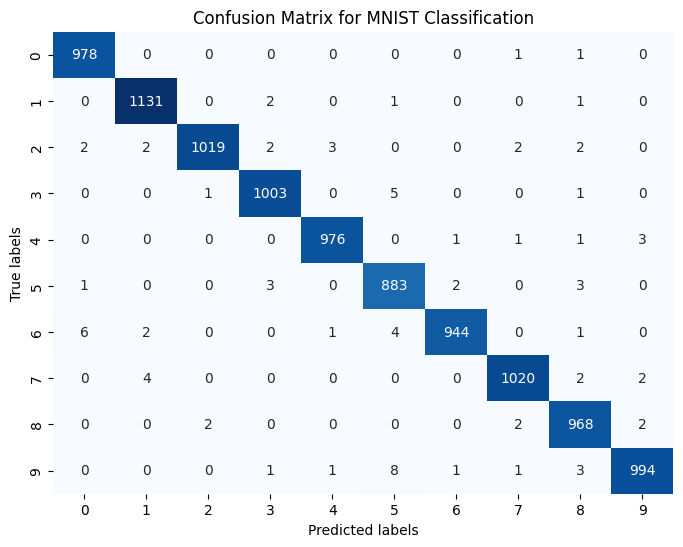

In [24]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Hyperparameter Tuning for Convolutional Neural Networks

* You can use the same strategies learned for tuning regular neural networks
* First, reduce the number of layers

In [25]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2143 - accuracy: 0.9375 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 2/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 3/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0507 - val_accuracy: 0.9867
Epoch 4/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 5/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0533 - val_accuracy: 0.9857
313/313 - 0s - loss: 0.0514 - accuracy: 0.9835 - 431ms/epoch - 1ms/step

Test accuracy: 0.9835000038146973


* Remove the post-processing Dense layer

In [26]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 11ms/step - loss: 0.2005 - accuracy: 0.9415 - val_loss: 0.0636 - val_accuracy: 0.9817
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0387 - val_accuracy: 0.9887
313/313 - 1s - loss: 0.0402 - accuracy: 0.9867 - 734ms/epoch - 2ms/step

Test accuracy: 0.9866999983787537


* Have more filters in the convolutional layers

In [27]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 21s 24ms/step - loss: 0.1649 - accuracy: 0.9496 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0479 - val_accuracy: 0.9880
313/313 - 2s - loss: 0.0400 - accuracy: 0.9886 - 2s/epoch - 5ms/step

Test accuracy: 0.9886000156402588


* Add an extra pooling layer

In [43]:
# Build the model
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 10ms/step - loss: 0.2843 - accuracy: 0.9122 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 2/5
844/844 [==============================] - 8s 10ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 4/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9885
313/313 - 1s - loss: 0.0491 - accuracy: 0.9869 - 611ms/epoch - 2ms/step

Test accuracy: 0.9868999719619751


* Remove some pooling layers

In [55]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 3/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0306 - val_accuracy: 0.9918
Epoch 4/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0311 - val_accuracy: 0.9925
313/313 - 2s - loss: 0.0226 - accuracy: 0.9934 - 2s/epoch - 5ms/step

Test accuracy: 0.993399977684021


## A Few Warnings
* Because of the downsampling/dimensionality reduction performed by the convolutional and pooling layers, you can reduce the information passed onto the next layer to nothing (`ValueError`)
* Tips to fix these errors:
    * Reduce the number of layers, especially the number of pooling layers
    * Reduce the pool size (minimum is (2,2))
    * Use the `padding="same"` for the Conv2D layers
* These networks can take a very long time to train, especially with many filters, many layers, or a large amount of data